Assignment:1 by Varisha Sajjad
Submitted to: M. Abdullah Naeem
 

Random Forest classifier!!

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Load dataset
cancer = load_breast_cancer()
X_q2 = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_q2 = pd.Series(cancer.target)

# Split dataset
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(
    X_q2, y_q2, test_size=0.2, random_state=42
)

# Traininh Random Forest
rf_q2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_q2.fit(X_train_q2, y_train_q2)

# Predicting
y_pred_q2 = rf_q2.predict(X_test_q2)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test_q2, y_pred_q2))


Random Forest Accuracy: 0.9649122807017544


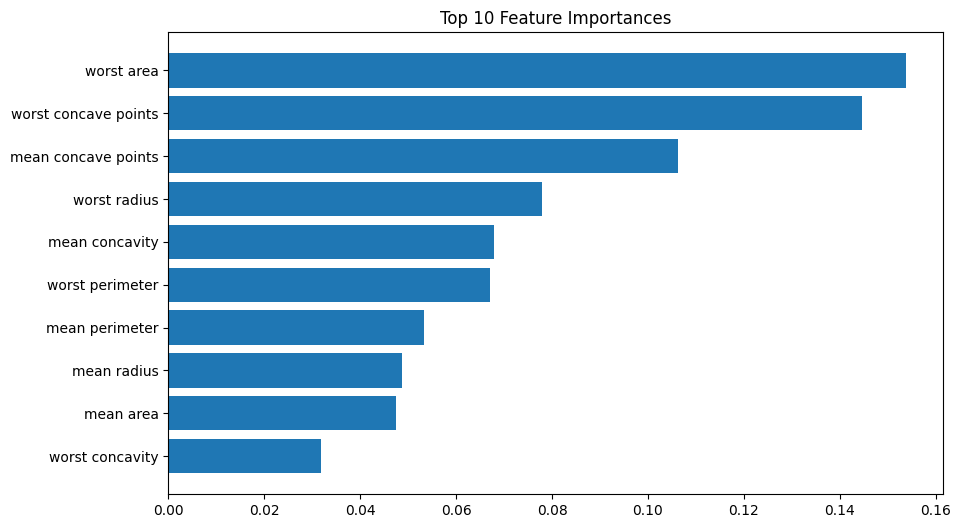

In [5]:
import matplotlib.pyplot as plt

# Feature importance
feat_imp = pd.Series(rf_q2.feature_importances_, index=X_q2.columns).sort_values(ascending=False)

# Plot top 10 features using Matplotlib
plt.figure(figsize=(10,6))
plt.barh(feat_imp.index[:10], feat_imp[:10])
plt.gca().invert_yaxis()  # highest on top
plt.title("Top 10 Feature Importances")
plt.show()


### Q3: Confusion Matrix and ROC Curve – Model Evaluation
We calculate Accuracy, Precision, Recall, and F1-Score based on the given confusion matrix.
We also plot the ROC Curve to visualize model performance and trade-offs between False Positives and True Positives.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

# Confusion matrix values
TP = 50  # True Positives
FN = 30  # False Negatives
FP = 10  # False Positives
TN = 110 # True Negatives

# Convert to arrays for sklearn metrics
y_true = np.array([1]*TP + [1]*FN + [0]*FP + [0]*TN)  # actual values
y_pred = np.array([1]*TP + [0]*FN + [1]*FP + [0]*TN)  # predicted values

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.80
Precision: 0.83
Recall: 0.62
F1-Score: 0.71


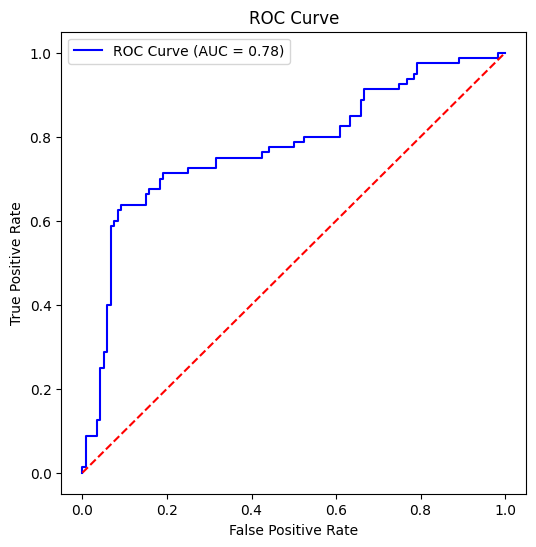

In [7]:
import matplotlib.pyplot as plt

# Assume probability scores for ROC example
y_scores = np.concatenate([np.random.uniform(0.6,1.0,TP), 
                           np.random.uniform(0.0,0.4,FN), 
                           np.random.uniform(0.6,1.0,FP), 
                           np.random.uniform(0.0,0.4,TN)])

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Knn Algo

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load dataset (Iris is simple and built-in)
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Optimal K: 3 with cross-validated accuracy: 0.96


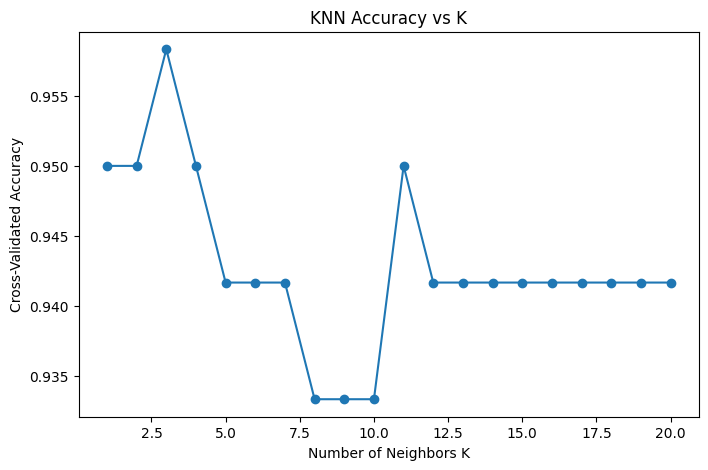

In [9]:
k_values = range(1, 21)  # K from 1 to 20
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the K with the highest accuracy
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal K: {optimal_k} with cross-validated accuracy: {max(cv_scores):.2f}")

# Plot accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()


In [10]:
# Train with optimal K
knn_opt = KNeighborsClassifier(n_neighbors=optimal_k)
knn_opt.fit(X_train, y_train)
accuracy = knn_opt.score(X_test, y_test)
print(f"Test Accuracy with K={optimal_k}: {accuracy:.2f}")


Test Accuracy with K=3: 1.00


The optimal K=3 gives the highest test accuracy of 1.00, it indicate the model perfectly classified all test samples.


Bayesian Network

In [11]:
!pip install pgmpy



In [13]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


In [15]:
# Loan Approval depends on Income Level and Credit Score
model = DiscreteBayesianNetwork([('Income', 'LoanApproval'), ('CreditScore', 'LoanApproval')])

# Define CPDs
cpd_income = TabularCPD(variable='Income', variable_card=2, values=[[0.6], [0.4]])  # 0=Low, 1=High
cpd_credit = TabularCPD(variable='CreditScore', variable_card=2, values=[[0.7], [0.3]])  # 0=Low, 1=High
cpd_loan = TabularCPD(variable='LoanApproval', variable_card=2,
                       values=[[0.9, 0.6, 0.7, 0.1],  # P(Loan=No)
                               [0.1, 0.4, 0.3, 0.9]], # P(Loan=Yes)
                       evidence=['Income','CreditScore'],
                       evidence_card=[2,2])

# Add CPDs to the model
model.add_cpds(cpd_income, cpd_credit, cpd_loan)

# Check model validity
print("Model is valid:", model.check_model())


Model is valid: True


In [16]:
infer = VariableElimination(model)

# Probability of Loan Approval given High Income and Low Credit Score
prob = infer.query(variables=['LoanApproval'], evidence={'Income':1, 'CreditScore':0})
print(prob)


+-----------------+---------------------+
| LoanApproval    |   phi(LoanApproval) |
+=================+=====================+
| LoanApproval(0) |              0.7000 |
+-----------------+---------------------+
| LoanApproval(1) |              0.3000 |
+-----------------+---------------------+


Given a high income but low credit score, the Bayesian Network predicts a 70% probability of loan approval and 30% probability of rejection.


In [ ]:
infer = VariableElimination(model)

# Probability of Loan Approval given High Income and Low Credit Score
prob = infer.query(variables=['LoanApproval'], evidence={'Income':1, 'CreditScore':0})
print(prob)


+-----------------+---------------------+
| LoanApproval    |   phi(LoanApproval) |
+=================+=====================+
| LoanApproval(0) |              0.7000 |
+-----------------+---------------------+
| LoanApproval(1) |              0.3000 |
+-----------------+---------------------+


### Q1: Support Vector Machines (SVM) – Decision Boundaries



In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"SVM with {kernel} kernel Accuracy: {acc:.4f}")


SVM with linear kernel Accuracy: 0.9561
SVM with poly kernel Accuracy: 0.9474
SVM with rbf kernel Accuracy: 0.9474


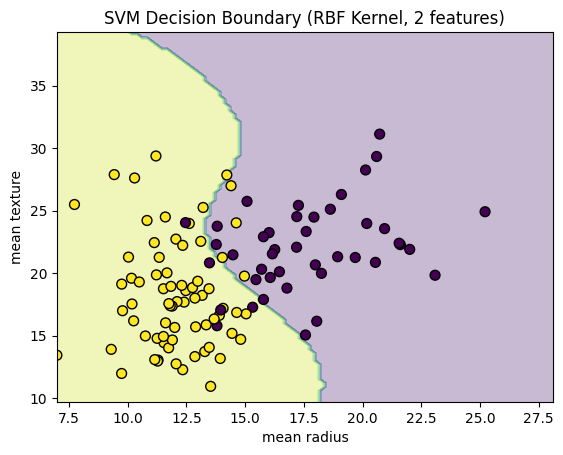

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Use only first 2 features for visualization
X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train SVM with RBF kernel
svm_vis = SVC(kernel='rbf')
svm_vis.fit(X_train_vis, y_train_vis)

# Create grid
xx, yy = np.meshgrid(np.linspace(X_vis[:,0].min(), X_vis[:,0].max(), 100),
                     np.linspace(X_vis[:,1].min(), X_vis[:,1].max(), 100))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test_vis[:,0], X_test_vis[:,1], c=y_test_vis, s=50, edgecolors='k')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("SVM Decision Boundary (RBF Kernel, 2 features)")
plt.show()
